# Проектное задание

### Задача: Какие характеристики наиболее значимы для поступления абитуриента? Построить модель, предсказывающую вероятность поступление кандидата в университет по имеющимся данным в его статистике, что можно использовать как самому кандидату, для оценки его возможностей, так и университету, чтобы составить список потенциальных студентов. Было необходимо выявить взаимосвязь между вероятностью поступления и параметрами каждого кандидата.
##### Источник датасета: kaggle.com

#### Заметка: поскольку мы бы хотели узнать, наибольшую точность в предсказании вероятности поступления, будем использовать линейную регрессию

In [82]:
# Загружаем библиотеки
import numpy as np # работа с векторами
import matplotlib.pyplot as plt # рисовать графики
import pandas as pd # для работы с матрицами
import os as os #для смены директории
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(color_codes=True)

# Установим директорию для загрузки данных для модели
os.chdir('C:/Study/Data_Analysis')

# загружаем данные
dataset = pd.read_csv('Admission_Predict.csv')

### В датасете содержится информация по каждому кандидату - академические характеристики (GRE Score, CGPA, Research etc) и вероятность поступления от 0 до 1. Строчек с пропущенными значениями нет. Категориальных переменных нет.

In [83]:
print(dataset.head())
print(dataset.columns)
print(dataset.describe())
print(dataset.info())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.

### Предположим, что кандидаты, проводившие исследования, имеют больше шансов на поступление. Как можно заметить по среднему значению, скорее всего, это так. Проверим эту гипотезу подробнее чуть дальше

In [85]:
grouped_ds = dataset.groupby(['Research'])
grouped_ds['Chance of Admit '].describe().unstack()

       Research
count  0           181.000000
       1           219.000000
mean   0             0.637680
       1             0.795982
std    0             0.113784
       1             0.123051
min    0             0.340000
       1             0.360000
25%    0             0.570000
       1             0.730000
50%    0             0.650000
       1             0.800000
75%    0             0.720000
       1             0.900000
max    0             0.890000
       1             0.970000
dtype: float64

In [4]:
pX = dataset.iloc[:, 1].values
X = pX.reshape(-1, 1)
y = dataset.iloc[:, 8].values
y.reshape(-1,1)

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45],
       [0.52],
       [0.84],
       [0.78],
       [0.62],
       [0.61],
       [0.54],
       [0.66],
       [0.65],
       [0.63],
       [0.62],
       [0.64],
       [0.7 ],
       [0.94],
       [0.95],
       [0.97],
       [0.94],
       [0.76],
       [0.44],
       [0.46],
       [0.54],
       [0.65],
       [0.74],
       [0.91],
       [0.9 ],
       [0.94],
       [0.88],
       [0.64],
       [0.58],
       [0.52],
       [0.48],
       [0.46],
       [0.49],
       [0.53],
       [0.87],
       [0.91],
       [0.88],
       [0.86],
       [0.89],
       [0.82],
       [0.78],
       [0.76],
       [0.56],
       [0.78],
       [0.72],
       [0.7 ],
       [0.64],
       [0.64],
       [0.46],
       [0.36],
       [0.42],
       [0.48],
       [0.47],
       [0.54],
       [0.56],
       [0.52],
       [0.55],
       [0.

In [5]:
# Разделим данные на тренировочную и тестовую выборку
# random_state = позволяет получать всегда одинаковое разбиение выборки
# X пишем сбольшой буквы это вектор.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
#Строим модель на тренировочных данных. 
reg.fit(X_train,y_train)
reg.intercept_, reg.coef_

(-2.500187457625873, array([0.01018826]))

In [7]:
reg.score(X_train,y_train)

0.6780551092781073

#### Сперва проверили наиболее очевидную взаимосвязь - GRE Score / Вероятность поступления

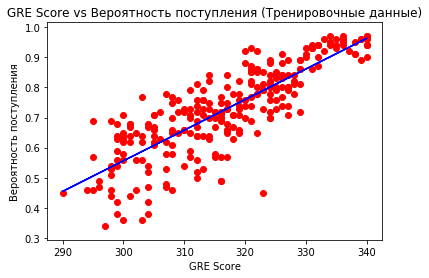

In [8]:
#Прогнозируем результаты тестовой выборки
#Разница между y_pred и y_test в том, что y_pred это прогнозные значения
#Теперь мы можем сравнить их с тестовыми значениями
y_pred = reg.predict(X_test)

#Визуализация результатов тестового набор данных
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train, reg.predict(X_train), color = 'blue')
plt.title('GRE Score vs Вероятность поступления (Тренировочные данные)')
plt.xlabel('GRE Score')
plt.ylabel("Вероятность поступления")
plt.show() #команда для отображения графика

#### По регрессии видно зависимость вероятности поступления от GRE Score, но существуют значительные отклонения. Проверим влияние TOEFL, University rating & CGPA

In [9]:
pX = dataset.iloc[:, 2].values
X = pX.reshape(-1, 1)
y = dataset.iloc[:, 8].values
y.reshape(-1,1)

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45],
       [0.52],
       [0.84],
       [0.78],
       [0.62],
       [0.61],
       [0.54],
       [0.66],
       [0.65],
       [0.63],
       [0.62],
       [0.64],
       [0.7 ],
       [0.94],
       [0.95],
       [0.97],
       [0.94],
       [0.76],
       [0.44],
       [0.46],
       [0.54],
       [0.65],
       [0.74],
       [0.91],
       [0.9 ],
       [0.94],
       [0.88],
       [0.64],
       [0.58],
       [0.52],
       [0.48],
       [0.46],
       [0.49],
       [0.53],
       [0.87],
       [0.91],
       [0.88],
       [0.86],
       [0.89],
       [0.82],
       [0.78],
       [0.76],
       [0.56],
       [0.78],
       [0.72],
       [0.7 ],
       [0.64],
       [0.64],
       [0.46],
       [0.36],
       [0.42],
       [0.48],
       [0.47],
       [0.54],
       [0.56],
       [0.52],
       [0.55],
       [0.

In [10]:
# Разделим данные на тренировочную и тестовую выборку
# random_state = позволяет получать всегда одинаковое разбиение выборки
# X пишем сбольшой буквы это вектор.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [11]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
#Строим модель на тренировочных данных. 
reg.fit(X_train,y_train)
reg.intercept_, reg.coef_

(-1.3017671913787057, array([0.01888088]))

In [12]:
reg.score(X_train,y_train)

0.6448273546658434

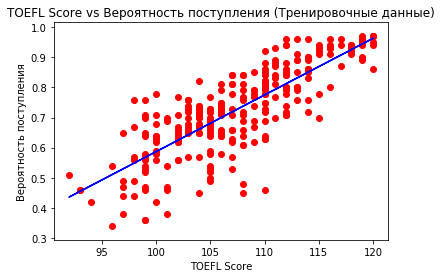

In [13]:
y_pred = reg.predict(X_test)
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train, reg.predict(X_train), color = 'blue')
plt.title('TOEFL Score vs Вероятность поступления (Тренировочные данные)')
plt.xlabel('TOEFL Score')
plt.ylabel("Вероятность поступления")
plt.show() #команда для отображения графика

#### В целом, есть некоторая зависимость вероятности поступления от TOEFL Score, но нельзя сказать, что этот параметр является решающим

In [14]:
pX = dataset.iloc[:, 3].values
X = pX.reshape(-1, 1)
y = dataset.iloc[:, 8].values
y.reshape(-1,1)

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45],
       [0.52],
       [0.84],
       [0.78],
       [0.62],
       [0.61],
       [0.54],
       [0.66],
       [0.65],
       [0.63],
       [0.62],
       [0.64],
       [0.7 ],
       [0.94],
       [0.95],
       [0.97],
       [0.94],
       [0.76],
       [0.44],
       [0.46],
       [0.54],
       [0.65],
       [0.74],
       [0.91],
       [0.9 ],
       [0.94],
       [0.88],
       [0.64],
       [0.58],
       [0.52],
       [0.48],
       [0.46],
       [0.49],
       [0.53],
       [0.87],
       [0.91],
       [0.88],
       [0.86],
       [0.89],
       [0.82],
       [0.78],
       [0.76],
       [0.56],
       [0.78],
       [0.72],
       [0.7 ],
       [0.64],
       [0.64],
       [0.46],
       [0.36],
       [0.42],
       [0.48],
       [0.47],
       [0.54],
       [0.56],
       [0.52],
       [0.55],
       [0.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression()
#Строим модель на тренировочных данных. 
reg.fit(X_train,y_train)
reg.intercept_, reg.coef_

(0.44358974358974346, array([0.0903663]))

In [17]:
reg.score(X_train,y_train)

0.5311577158601384

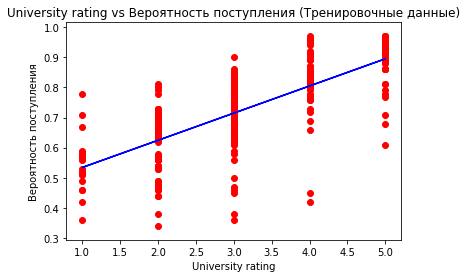

In [18]:
y_pred = reg.predict(X_test)
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train, reg.predict(X_train), color = 'blue')
plt.title('University rating vs Вероятность поступления (Тренировочные данные)')
plt.xlabel('University rating')
plt.ylabel("Вероятность поступления")
plt.show() #команда для отображения графика

#### По графику можно сказать, что наивысшая вероятность поступления достигается при рейтингах учебного заведения 4-5. Возникает вопрос - а есть ли четкая взаимосвязь между рейтингом университета и вероятностью поступления? На него ответим чуть позже

In [19]:
pX = dataset.iloc[:, 6].values
X = pX.reshape(-1, 1)
y = dataset.iloc[:, 8].values
y.reshape(-1,1)

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45],
       [0.52],
       [0.84],
       [0.78],
       [0.62],
       [0.61],
       [0.54],
       [0.66],
       [0.65],
       [0.63],
       [0.62],
       [0.64],
       [0.7 ],
       [0.94],
       [0.95],
       [0.97],
       [0.94],
       [0.76],
       [0.44],
       [0.46],
       [0.54],
       [0.65],
       [0.74],
       [0.91],
       [0.9 ],
       [0.94],
       [0.88],
       [0.64],
       [0.58],
       [0.52],
       [0.48],
       [0.46],
       [0.49],
       [0.53],
       [0.87],
       [0.91],
       [0.88],
       [0.86],
       [0.89],
       [0.82],
       [0.78],
       [0.76],
       [0.56],
       [0.78],
       [0.72],
       [0.7 ],
       [0.64],
       [0.64],
       [0.46],
       [0.36],
       [0.42],
       [0.48],
       [0.47],
       [0.54],
       [0.56],
       [0.52],
       [0.55],
       [0.

In [20]:
# Разделим данные на тренировочную и тестовую выборку
# random_state = позволяет получать всегда одинаковое разбиение выборки
# X пишем сбольшой буквы это вектор.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [21]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
#Строим модель на тренировочных данных. 
reg.fit(X_train,y_train)
reg.intercept_, reg.coef_

(-1.0867847569488873, array([0.21053413]))

In [22]:
reg.score(X_train,y_train)

0.8008378841584421

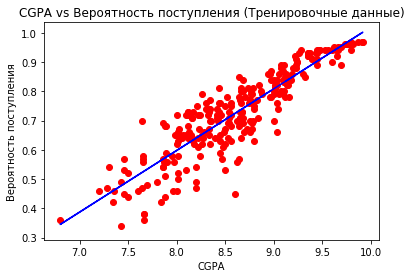

In [23]:
y_pred = reg.predict(X_test)

#Визуализация результатов тестового набор данных
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train, reg.predict(X_train), color = 'blue')
plt.title('CGPA vs Вероятность поступления (Тренировочные данные)')
plt.xlabel('CGPA')
plt.ylabel("Вероятность поступления")
plt.show() #команда для отображения графика

#### CGPA и GRE показали наибольшее влияние на вероятность поступления Соберем их в один параметр через нахождение среднего, а TOEFL& University ranking будем добавлять к параметру как бонус-штраф. В TOEFL за коэффициент 1 возьмем 105, в university ranking за 1 возьмем значение 2

In [24]:
pX = dataset.iloc[:, 6].values
a = len(pX)

urX = dataset.iloc[:, 3].values

pXb = dataset.iloc[:, 1].values
Xb = pXb.reshape(-1,1)

toeflX = dataset.iloc[:, 2].values

i = 0
fl = []
while i < a:
    mean = [pX[i], pXb[i]]
    mv = np.mean(mean)
    mv = mv*(1+urX[i]*0.01 + (toeflX[i] - 105)*0.003)
    fl.append(mv)
    i = i+1
tempX = np.array(fl)
X = tempX.reshape(-1,1)
y = dataset.iloc[:, 8].values
y.reshape(-1,1)
b = len(fl)
b

400

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

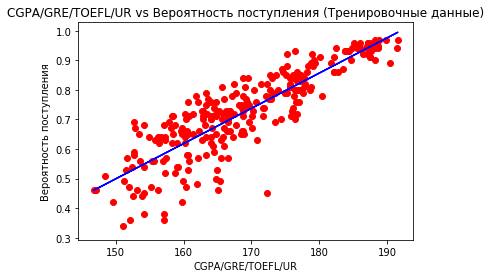

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.intercept_, reg.coef_
y_pred = reg.predict(X_test)
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train, reg.predict(X_train), color = 'blue')
plt.title('CGPA/GRE/TOEFL/UR vs Вероятность поступления (Тренировочные данные)')
plt.xlabel('CGPA/GRE/TOEFL/UR')
plt.ylabel("Вероятность поступления")
plt.show() #команда для отображения графика

In [27]:
reg.score(X_train,y_train)

0.7505879830120615

### При беглом просмотре данных, заметили, что у тех кандидатов, у которых есть research, баллы по остальным параметрам выше. Проверка:

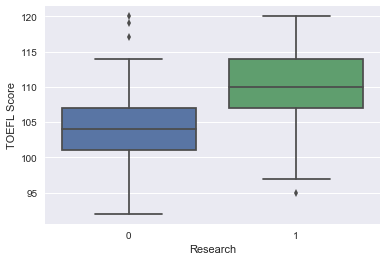

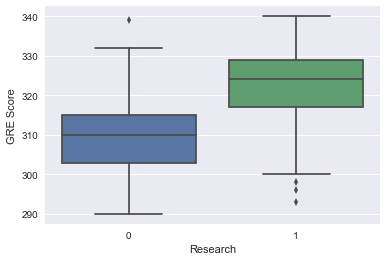

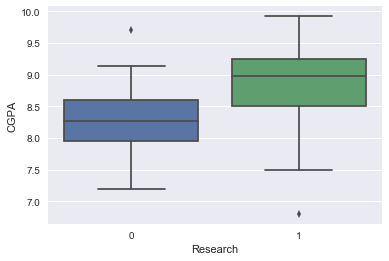

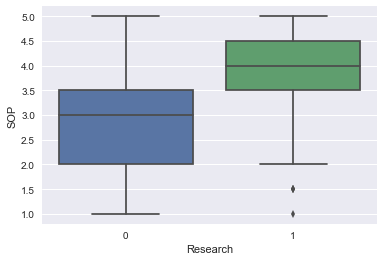

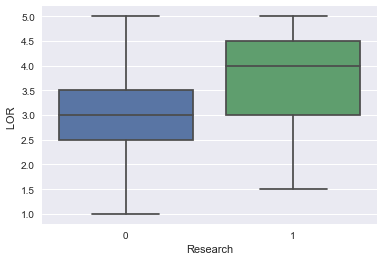

In [50]:
sns.boxplot(x = "Research", y = "TOEFL Score", data = dataset)
plt.ylabel("TOEFL Score")
plt.show()
sns.boxplot(x = "Research", y = "GRE Score", data = dataset)
plt.ylabel("GRE Score")
plt.show()
sns.boxplot(x = "Research", y = "CGPA", data = dataset)
plt.ylabel("CGPA")
plt.show()
sns.boxplot(x = "Research", y = "SOP", data = dataset)
plt.ylabel("SOP")
plt.show()
sns.boxplot(x = "Research", y = "LOR ", data = dataset)
plt.ylabel("LOR ")
plt.show()

### Как видно на графиках, вероятность поступления у тех, у кого был research, выше, чем у остальных

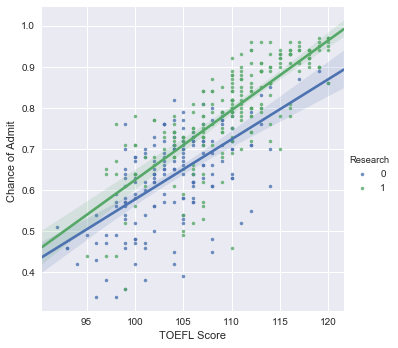

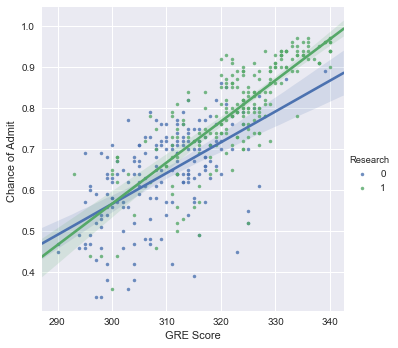

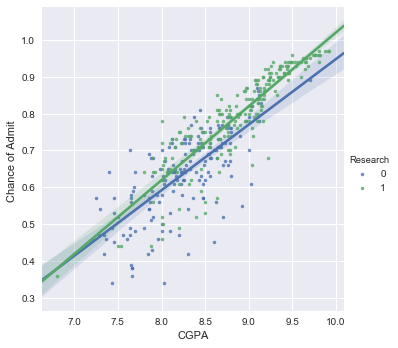

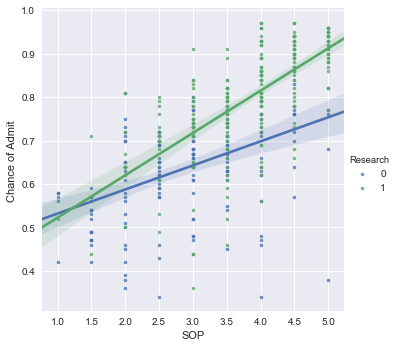

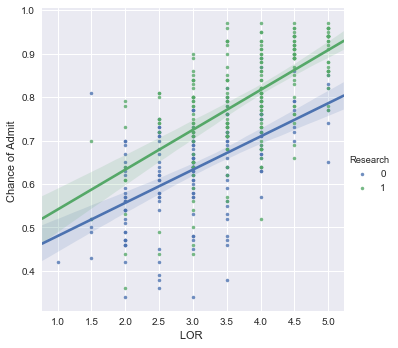

In [52]:
sns.lmplot(x = "TOEFL Score", y = "Chance of Admit ", data = dataset, hue = "Research", markers = ".")
plt.show()
sns.lmplot(x = "GRE Score", y = "Chance of Admit ", data = dataset, hue = "Research", markers = ".")
plt.show()
sns.lmplot(x = "CGPA", y = "Chance of Admit ", data = dataset, hue = "Research", markers = ".")
plt.show()
sns.lmplot(x = "SOP", y = "Chance of Admit ", data = dataset, hue = "Research", markers = ".")
plt.show()
sns.lmplot(x = "LOR ", y = "Chance of Admit ", data = dataset, hue = "Research", markers = ".")
plt.show()

#### Теперь проверим, действительно ли рейтинг университета сильно влияет на поступление, т.е. найдем силу взаимосвязи

In [28]:
# Здесь переходим фактически к задаче классификации. Решение должно отвечать на вопрос - имеет ли кандидат достаточные
# шансы на поступление или нет.
bb=list(dataset.columns.values)
bb
dataset = dataset.assign(probability=dataset['Chance of Admit '])
y = dataset.iloc[:, 8].values
a = len(y)
pX = dataset.iloc[:, 9].values
#dataset = dataset[dataset['Chance of Admit'].isin(['GRE Score', 'TOEFL Score', 'University Rating', 'CGPA']) ]
#dataset = pd.get_dummies(dataset, columns = ['Chance of Admit '])

i = 0
fl = []
# Определим 0 как малую вероятность и 1 как большую вероятность
while i < a:
    v = y[i]
    label = 'dull'
    if v <= 0.25:
        label = 0
    if (v <= 0.5) and (v > 0.25):
        label = 0
    if (v <= 0.75) and (v > 0.5):
        label = 0
    if (v <= 0.85) and (v > 0.75):
        label = 1
    if (v <= 0.999) and (v > 0.85):
        label = 1
    pX[i] = label
    fl.append(v)
    i = i+1
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.0


In [29]:
from causalinference import CausalModel

In [30]:
causal = CausalModel(Y = dataset['University Rating'].values,
                     D = dataset['probability'].values,
                     X = dataset[['CGPA', 'GRE Score', 'TOEFL Score']].values)

In [31]:
causal.est_via_ols(adj = 0)
print(causal.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      1.499      0.089     16.841      0.000      1.324      1.673



C:\ProgramData\Anaconda3\lib\site-packages\causalinference\estimators\ols.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  olscoef = np.linalg.lstsq(Z, Y)[0]


In [32]:
causal.est_via_ols()
print(causal.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.384      0.125      3.078      0.002      0.139      0.628
           ATC      0.332      0.164      2.023      0.043      0.010      0.654
           ATT      0.452      0.129      3.504      0.000      0.199      0.705



C:\ProgramData\Anaconda3\lib\site-packages\causalinference\estimators\ols.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  olscoef = np.linalg.lstsq(Z, Y)[0]


#### Исходя из показателей АТЕ и АТТ, а также p-value, делаем вывод, что рейтинг университета действительно связан с вероятностью поступления

### Влияние параметров при переводе задачи в классификацию

In [67]:
os.chdir('C:/Study/Data_Analysis')
dataset = pd.read_csv('Admission_Predict.csv')

In [68]:
bb=list(dataset.columns.values)
bb
dataset = dataset.assign(probability=dataset['Chance of Admit '])
y = dataset.iloc[:, 8].values
a = len(y)
pX = dataset.iloc[:, 9].values
#dataset = dataset[dataset['Chance of Admit'].isin(['GRE Score', 'TOEFL Score', 'University Rating', 'CGPA']) ]
#dataset = pd.get_dummies(dataset, columns = ['Chance of Admit '])

i = 0
fl = []
# Определим 0 как малую вероятность и 1 как большую вероятность
while i < a:
    v = y[i]
    label = 'dull'
    if v <= 0.25:
        label = 0
    if (v <= 0.5) and (v > 0.25):
        label = 0
    if (v <= 0.75) and (v > 0.5):
        label = 0
    if (v <= 0.85) and (v > 0.75):
        label = 1
    if (v <= 0.999) and (v > 0.85):
        label = 1
    pX[i] = label
    fl.append(v)
    i = i+1
#dataset = pd.get_dummies(dataset, columns = ['probability'])
dataset = dataset.drop(['Chance of Admit '], axis = 1)
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,probability
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [69]:
X = dataset.iloc[:, dataset.columns != 'probability'].values
y = dataset.iloc[:,8].values

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 31)

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
modelGB = GradientBoostingClassifier(n_estimators=100)
modelGB.fit(X_train, y_train)
y_train_pred = modelGB.predict(X_train)
y_test_pred = modelGB.predict(X_test)

recall_score(y_train, y_train_pred, average='macro'), recall_score(y_test, y_test_pred, average='macro')

(1.0, 0.834358623832308)

In [72]:
names = list(dataset)

import eli5
feat_imp_tree = eli5.explain_weights_df(modelGB, feature_names=names[0:8])
feat_imp_tree.head(n = 9)

,feature,weight,std
0,CGPA,0.313007,0.280749
1,Serial No.,0.201324,0.245043
2,GRE Score,0.181363,0.190656
3,TOEFL Score,0.122742,0.162280
4,LOR,0.094259,0.129370
5,SOP,0.041201,0.069226
6,Research,0.027186,0.060829
7,University Rating,0.018918,0.089518


In [73]:
from eli5.sklearn import PermutationImportance
permGB = PermutationImportance(modelGB).fit(X_test, y_test)
eli5.explain_weights_df(permGB, feature_names=names[0:8]).head(n = 10)

,feature,weight,std
0,GRE Score,0.059701,0.016350
1,CGPA,0.038806,0.013679
2,Serial No.,0.008955,0.011940
3,SOP,0.005970,0.007312
4,Research,0.000000,0.006675
5,University Rating,-0.001493,0.002985
6,TOEFL Score,-0.004478,0.005970
7,LOR,-0.010448,0.007610


In [74]:
eli5.show_weights(permGB, feature_names=names[0:8])

Weight,Feature
0.0597 ± 0.0327,GRE Score
0.0388 ± 0.0274,CGPA
0.0090 ± 0.0239,Serial No.
0.0060 ± 0.0146,SOP
0.0000 ± 0.0133,Research
-0.0015 ± 0.0060,University Rating
-0.0045 ± 0.0119,TOEFL Score
-0.0104 ± 0.0152,LOR


## LIME

In [75]:
import lime
from lime.lime_tabular import LimeTabularExplainer

In [76]:
explainer = LimeTabularExplainer(X_train, mode='classification', 
                                 feature_names=names[0:32]) 

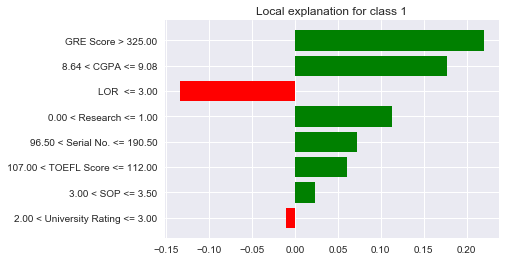

In [77]:
exp = explainer.explain_instance(X_test[133,:], 
                                 modelGB.predict_proba)
exp.as_pyplot_figure();

In [78]:
exp.show_in_notebook()

### Пример на расчете кандидата №133. Как видно по иллюстрации выше, он попадает в группу с высокой вероятностью поступления

### Вывод: была построена модель линейной регрессии, которая позволит оценить кандидату шансы на поступление, а университету предположить по имеющимся данным, является ли данный абитуриент потенциальным студентом или нет. Дополнительно была подтверждена взаимосвязь рейтинга университета с вероятностью поступления.

## Главными параметрами, влияющими на поступление были GRE Score, CGPA, наличие исследований (параметр research) также положительно влиял на вероятность поступления